# Bellabeat Data Analysis Capstone Project

## Introduction

This is a data analysis project created as part of the Google Data Analytics Professional Certificate. The project is an analysis of fitness tracker usage data collected from FitBit users via a distributed survey from 03/12/2016 - 05/12/2016. The database includes data for 30 eligible users who submitted day, hour, and minute-level data recorded on their FitBit devices for a number of variables such as calories, heart rate, steps, sleep, and more. 

The objective of this project is to understand how consumers use non-Bellabeat smart devices. We will be attempting to answer the following questions:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence the Bellabeat marketing strategy?

With these insights, we will be selecting one Bellabeat product to make recommendations for.

## About the Data

The data is organised into 29 .csv files for each of the two months of data that were collected. These files are organised into different variables that were measured, as well as the rate at which the data was collected, e.g. Heart Rate (seconds), Calories (hourly and minute), etc.

We will be using the daily_activities.csv file as this contains information such as calories, intensities, and steps for each participant, we will also use the following .csv files to measure activity throughout the day: hourlyCalories, hourlyIntensities, and hourlySteps. And finally, we will also use sleepDay.csv to perform some analysis on the sleep patterns for the individuals in the data.

# Data Import into BigQuery

For this project, we will be using Google's BigQuery platoform to host our files and perform SQL queries. Before starting to query our files, we create a data set and upload each of our files as tables. This is no problem for our first file 'daily_activities.csv' however we are presented with our first difficulty when uploading our other files. The date values present in our hourly and sleep data files won't mesh well with BigQuery, and do not immediately conform to its requirements for DATETIME values. 

So we will upload these files as tables, and the affected columns as STRING data types, and run the following query to create a new table with the correct values for DATETIME.

# Data Cleaning and Processing in SQL

In [ ]:
-- Update ActivityHour column into DATETIME and remove 'AM' and 'PM' values for new_hourlycalories table from hourlycalories table

CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlycalories` AS
SELECT
    Id,
    PARSE_DATETIME('%m/%d/%Y %I:%M:%S %p', ActivityHour) AS ActivityHour,
    Calories
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.hourlycalories`
ORDER BY
    Id ASC,
    ActivityHour ASC;

-- Update ActivityHour column into DATETIME and remove 'AM' and 'PM' values for new_hourlyintensities table from hourlyintensities table

CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlyintensities` AS
SELECT
    Id,
    PARSE_DATETIME('%m/%d/%Y %I:%M:%S %p', ActivityHour) AS ActivityHour,
    TotalIntensity,
    AverageIntensity
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.hourlyintensities`
ORDER BY
    Id ASC,
    ActivityHour ASC;

-- Update ActivityHour column into DATETIME and remove 'AM' and 'PM' values for new_hourlysteps table from hourlysteps table

CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlysteps` AS
SELECT
    Id,
    PARSE_DATETIME('%m/%d/%Y %I:%M:%S %p', ActivityHour) AS ActivityHour,
    StepTotal
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.hourlysteps`
ORDER BY
    Id ASC,
    ActivityHour ASC;

-- Update SleepDay column into DATE and remove 'AM' and 'PM' values and 'HH:MM:SS' for new_sleepday table from sleepday table

CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday` AS
SELECT
    Id,
    DATE(PARSE_DATETIME('%m/%d/%Y %I:%M:%S %p', SleepDay)) AS SleepDay,
    TotalSleepRecords,
    TotalMinutesAsleep,
    TotalTimeInBed
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.sleepday`
ORDER BY
    Id ASC,
    SleepDay ASC;

Now that our columns are all the correct data types, we can continue with some more querying. We would like to begin to understand how many participants submitted their Daily Activity and Sleep data.

In [ ]:
-- Combined query for distinct counts of participant for each table
SELECT 
    'new_hourlycalories' AS hourlycalories, 
    COUNT(DISTINCT Id) AS distinct_id_count 
FROM 
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlycalories`
UNION ALL
SELECT 
    'new_hourlyintensities' AS hourlyintensities, 
    COUNT(DISTINCT Id) AS distinct_id_count 
FROM 
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlyintensities`
UNION ALL
SELECT 
    'new_hourlysteps' AS hourlysteps, 
    COUNT(DISTINCT Id) AS distinct_id_count 
FROM 
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlysteps`
UNION ALL
SELECT 
    'new_sleepday' AS sleepday, 
    COUNT(DISTINCT Id) AS distinct_id_count 
FROM 
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday`;


<div>
<img src="https://i.imgur.com/w3TMfUL.png" width="250"/>
</div>

We can see that we have 33 participants for the step, calorie, and intensity hourly data sets, but only 24 participants that submitted sleep data. This could be for a variety of reasons such as different devices unable to record sleep data, or due to individual behavioural trends where some users simply do not wear their devices to sleep.

Now we'll inspect the data for any duplicates and create new tables omitting them.

In [ ]:
-- Counting duplicate rows for each table we will analyse. We only need to include Id and ActivityHour/Date as we cannot have more than one entry per Hour/Date

SELECT
    'dailyactivity' AS table_name,
    Id,
    ActivityDate,
    COUNT(*) AS duplicate_count
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.dailyactivity`
GROUP BY
    Id,
    ActivityDate
HAVING
    COUNT(*) > 1

UNION ALL

SELECT
    'new_hourlycalories' AS table_name,
    Id,
    ActivityHour,
    COUNT(*) AS duplicate_count
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlycalories`
GROUP BY
    Id,
    ActivityHour
HAVING
    COUNT(*) > 1

UNION ALL

SELECT
    'new_hourlyintensities' AS table_name,
    Id,
    ActivityHour,
    COUNT(*) AS duplicate_count
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlyintensities`
GROUP BY
    Id,
    ActivityHour
HAVING
  COUNT(*) > 1

UNION ALL

SELECT
    'new_hourlysteps' AS table_name,
    Id,
    ActivityHour,
    COUNT(*) AS duplicate_count
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlysteps`
GROUP BY
    Id, 
    ActivityHour
HAVING
  COUNT(*) > 1

UNION ALL

SELECT
    'new_sleepday' AS table_name,
    Id,
    SleepDay,
    COUNT(*) AS duplicate_count
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday`
GROUP BY
    Id,
    SleepDay
HAVING
    COUNT(*) > 1;

<div>
<img src="https://i.imgur.com/RfFK3pQ.png" width="400"/>
</div>

SleepDay contains 3 instances of rows that were duplicated twice each based on `Id` and `ActivityDate`. This could be for a number of reasons, namely if a participant recorded 2 instances of Sleep Data in the same day, since we don't have data for what time the sleep was recorded, this would be most likely caused by taking a nap. Lets verify this by calling up each duplicated row to view it ourselves.


In [ ]:
-- Identifying the duplicate rows
WITH duplicate_rows AS (
    SELECT
        Id,
        SleepDay,
        COUNT(*) AS duplicate_count
    FROM
        `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday`
    GROUP BY
        Id, SleepDay
    HAVING
        COUNT(*) > 1
)

-- Retrieve all columns for which `Id` and `SleepDay` are duplicated, JOIN on `Id` and `SleepDay`.

SELECT
    sd.*
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday` AS sd
JOIN
    duplicate_rows AS dr
ON
    sd.Id = dr.Id AND sd.SleepDay = dr.SleepDay
ORDER BY
    sd.Id, sd.SleepDay;

<div>
<img src="https://i.imgur.com/dYZNWb5.png" width="500"/>
</div>

We can see that these rows are simply the results of mistaken duplication, as the other two columns `TotalMinutesAsleep` and `TotalTimeInBed` contain the same values, therefore we can update the `new_sleepday` table by removing these erroneous results.

In [ ]:
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday_v2` AS
SELECT DISTINCT
    Id,
    SleepDay,
    TotalSleepRecords,
    TotalMinutesAsleep,
    TotalTimeInBed
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday`
ORDER BY
    Id ASC,
    SleepDay ASC;

As the last step of our data cleaning process, we will be inspecting the hourly data tables for calories, steps, and intensities, and ensure that each distinct `Id` has equal data entry counts of all 3 tables.

In [ ]:
-- Creating subqueries to retrieve hourly counts in each table
WITH hourlycalories_counts AS (
    SELECT
        Id,
        COUNT(ActivityHour) AS hourlycalories_observations_count
    FROM
        `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlycalories`
    GROUP BY
        Id
),
hourlyintensities_counts AS (
    SELECT
        Id,
        COUNT(ActivityHour) AS hourlyintensities_observations_count
    FROM
        `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlyintensities`
    GROUP BY
        Id
),
hourlysteps_counts AS (
    SELECT
        Id,
        COUNT(ActivityHour) AS hourlysteps_observations_count
    FROM
        `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlysteps`
    GROUP BY
        Id
)

-- Joining results on Id, using COALESCE we ensure that Ids that are null on some tables but not others will still be counted (e.g if one participant chooses to record steps but not calories).
SELECT
    COALESCE(c.Id, i.Id, s.Id) AS Id,  -- Combine Id columns
    c.hourlycalories_observations_count,
    i.hourlyintensities_observations_count,
    s.hourlysteps_observations_count
FROM
    hourlycalories_counts AS c  -- Alias c for hourlycalories_counts
FULL OUTER JOIN
    hourlyintensities_counts AS i ON c.Id = i.Id  -- Alias i for hourlyintensities_counts
FULL OUTER JOIN
    hourlysteps_counts AS s ON COALESCE(c.Id, i.Id) = s.Id  -- Alias s for hourlysteps_counts
ORDER BY
    Id;

<div>
<img src="https://i.imgur.com/Mk94N69.png" width="500"/>
</div>
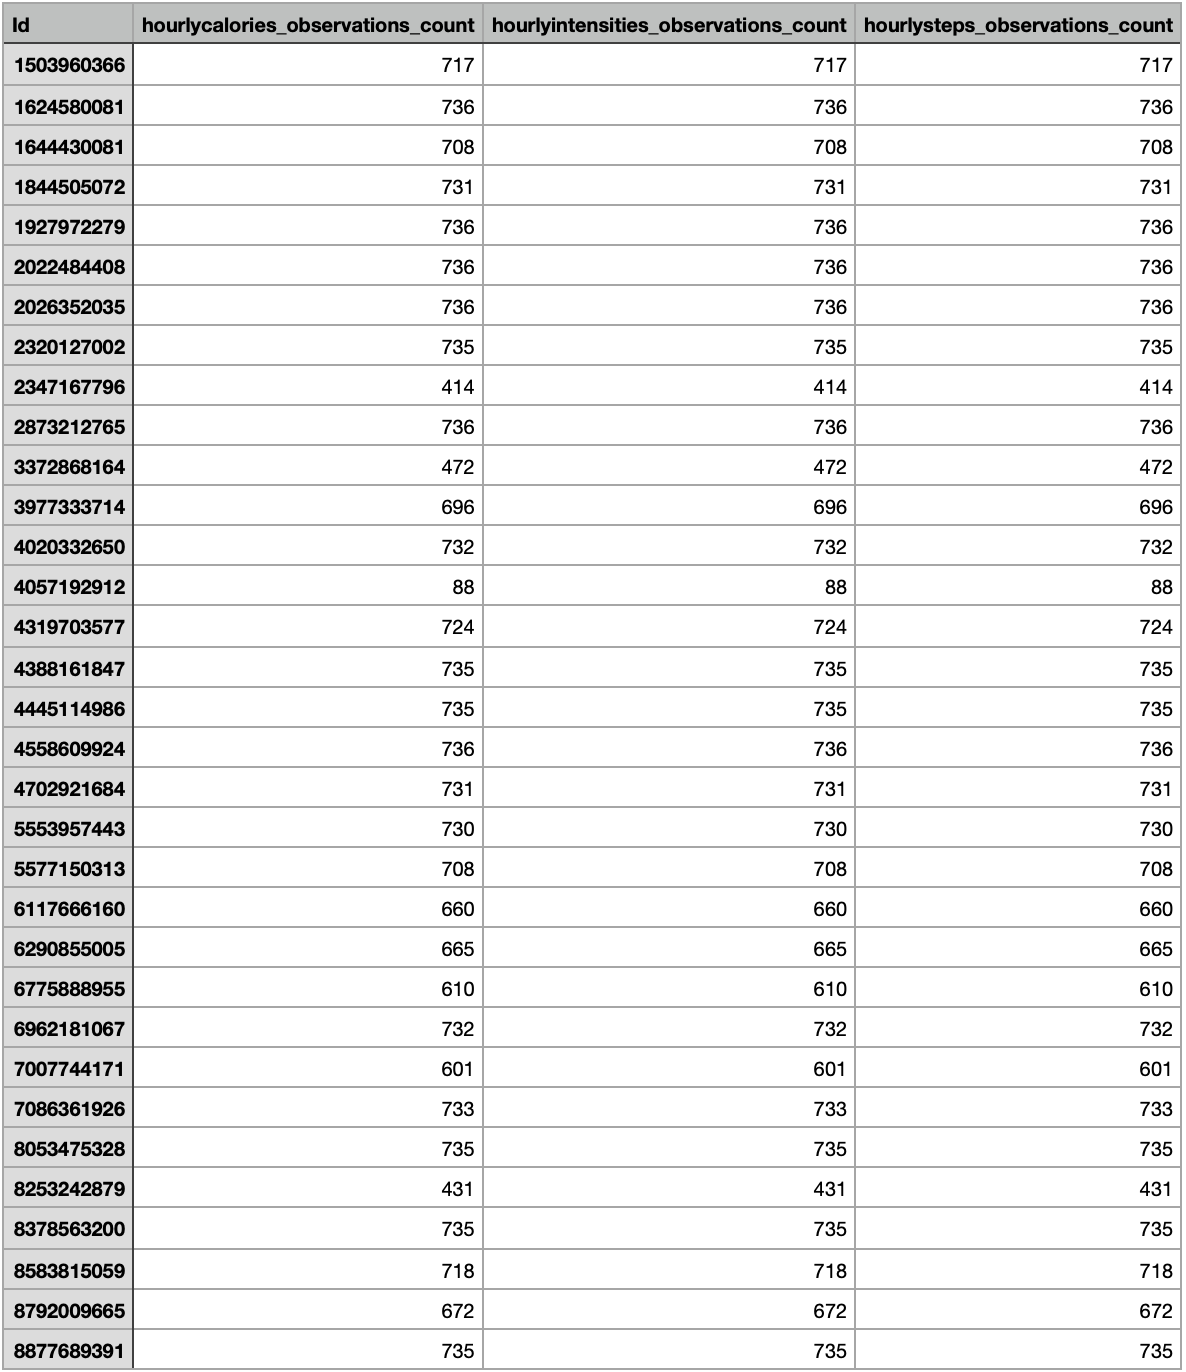

Now we can verify that for all 33 participants we have the same amount of entries in all 3 tables. We can confidently proceed with merging these tables into a single table, without running the risk of blank entries from users selectively submitting data.

In [ ]:
-- Create a new table by merging new_hourlycalories, new_hourlyintensities, and new_hourlysteps
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.merged_hourly_data` AS
SELECT
    c.*,              
    i.TotalIntensity,
    i.AverageIntensity,
    s.StepTotal
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlycalories` c
LEFT JOIN
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlyintensities` i
ON
    c.Id = i.Id
    AND c.ActivityHour = i.ActivityHour
LEFT JOIN
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_hourlysteps` s
ON
    c.Id = s.Id
    AND c.ActivityHour = s.ActivityHour
ORDER BY
    c.Id ASC,
    c.ActivityHour ASC

# Data Analysis in SQL

Now we will perform some basic analysis with our new tables, to help us with the visualisation task later on. First, we will be categorising smart device usage into 3 different categories.

**1. High**

*Users that record their activities/sleep for 21 to 31 days*

**2. Medium**

*Users that record their activities/sleep for 11 to 20 days*

**3. Low**

*Users that record their activities/sleep for 0 to 10 days*

From this we will be able to ascertain not only how often users that participated in this study recorded their data, but also learn a bit more about biases in our data by establising levels of usage in the demographic that was surveyed.

We will do this for the `dailyactivity` table and then for the `new_sleepday_v2` table as well. We will also apply these categories to the `merged_hourly_data` table, but will have the same results as `dailyactivity` table due to including the same participants in each data set.

## Categorising Smart Device Usage Levels 

In [ ]:
-- Create the usage_by_id table based on the categorisation of usage

CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.activity_usage_by_id` AS
SELECT
    Id,
    CASE
        WHEN COUNT(ActivityDate) BETWEEN 0 AND 10 THEN 'low'
        WHEN COUNT(ActivityDate) BETWEEN 11 AND 20 THEN 'medium'
        WHEN COUNT(ActivityDate) BETWEEN 21 AND 31 THEN 'high'
    END AS usage
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.dailyactivity`
GROUP BY
    Id
ORDER BY
    usage ASC,
    Id ASC;

In [ ]:
-- Create the sleep_usage_by_id table based on the categorization of usage
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.sleep_usage_by_id` AS
SELECT
    Id,
    CASE
        WHEN COUNT(SleepDay) BETWEEN 0 AND 10 THEN 'low'
        WHEN COUNT(SleepDay) BETWEEN 11 AND 20 THEN 'medium'
        WHEN COUNT(SleepDay) BETWEEN 21 AND 31 THEN 'high'
    END AS usage
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday_v2`
GROUP BY
    Id
ORDER BY
    usage ASC,
    Id ASC;



Now we add these categories as new columns in `daily_activity_use`,  `daily_sleep_use`, and `merged_hourly_data_use` by merging our newly created tables from before.

In [ ]:
-- Create the daily_activity_use table by merging daily_activity and activity_usage_by_id
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.daily_activity_use` AS
SELECT
    da.*,
    au.usage
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.dailyactivity` da
LEFT JOIN
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.activity_usage_by_id` au
ON
    da.Id = au.Id
ORDER BY
    Id ASC,
    ActivityDate ASC;

In [ ]:
-- Create the daily_sleep_use table by merging new_sleepday_v2 and sleep_usage_by_id
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.daily_sleep_use` AS
SELECT
    sdv2.*,   -- Select all columns from new_sleepday_v2
    su.usage  -- Select the usage column from sleep_usage_by_id
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.new_sleepday_v2` sdv2
LEFT JOIN
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.sleep_usage_by_id` su
ON
    sdv2.Id = su.Id
ORDER BY
    Id,
    SleepDay;

In [ ]:
-- Create the merged_hourly_data_use table by merging merged_hourly_data and activity_usage_by_id
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.merged_hourly_data_use` AS
SELECT
    mhd.*,   -- Select all columns from merged_hourly_data
    au.usage -- Select the usage column from activity_usage_by_id
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.merged_hourly_data` mhd
LEFT JOIN
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.activity_usage_by_id` au
ON
    mhd.Id = au.Id
ORDER BY
    Id ASC,
    ActivityHour ASC;

## Adding Day of The Week Column

Finally, we will add a a column containing STRING values for the day of the week each activity/sleep was recorded on.

We will use this later on in our visualisations to showcase usage over time, and trends across weekdays and weekends.

In [ ]:
-- Create the daily_activity_use_dow table by adding a new column for the day of the week
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.daily_activity_use_dow` AS
SELECT
    dau.*,   -- Select all columns from daily_activity_use
    FORMAT_TIMESTAMP('%A', PARSE_TIMESTAMP('%Y-%m-%d', CAST(dau.ActivityDate AS STRING))) AS dow
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.daily_activity_use` dau
ORDER BY
    Id ASC,
    ActivityDate ASC;

In [ ]:
--- Create the daily_sleep_use_dow table by adding a new column for the day of the week
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.daily_sleep_use_dow` AS
SELECT
    dsu.*,   -- Select all columns from daily_sleep_use
    FORMAT_TIMESTAMP('%A', PARSE_TIMESTAMP('%Y-%m-%d', CAST(dsu.SleepDay AS STRING))) AS dow
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.daily_sleep_use` dsu
ORDER BY
    Id ASC,
    SleepDay ASC;

In [ ]:
-- Create the merged_hourly_data_use_dow table by adding a new column for the day of the week
CREATE TABLE `bellabeat-case-study-430106.Fitabase_Data_041216_051216.merged_hourly_data_use_dow` AS
SELECT
    mhdu.*,   -- Select all columns from daily_sleep_use
    FORMAT_TIMESTAMP('%A', PARSE_TIMESTAMP('%Y-%m-%d %H:%M:%S', CAST(mhdu.ActivityHour AS STRING))) AS dow
FROM
    `bellabeat-case-study-430106.Fitabase_Data_041216_051216.merged_hourly_data_use` mhdu
ORDER BY
    Id ASC,
    ActivityHour ASC;

# Data Visualisation in Tableau

Now that we have created our final output .csv files we will import them into Tableau, and create summary visulisations, from which we will make our final recommendations.

## Figure 1

<div>
<img src="https://i.imgur.com/wVDYPHJ.png" width="500"/>
</div>

This table displays the results we created earlier on from our SQL query. As a reminder, the criteria for each usage level is as follows:

> **1. High**
>
>*Users that record their activities/sleep for 21 to 31 days*
>
>**2. Medium**
>
>*Users that record their activities/sleep for 11 to 20 days*
>
>**3. Low**
>
>*Users that record their activities/sleep for 0 to 10 days*

We can see that the vast majority of the users who submitted daily activity data are categorised as 'high' level users. Whereas we have substantially less who are 'medium' and 'low' level. We will be omitting the 'low' level user from further analysis as it would skew our resultsand make them too unreliable.

## Figure 2

<div>
<img src="https://i.imgur.com/HPQYwNN.png" width="500"/>
</div>

Our first visualisation illustrates the amount of daily 'Very Active Minutes' and 'Fairly Active Minutes' users undertake. This is segmented into two groups: 'high' and 'medium' level. We can see that the data for the 'high' level users doesn't change drastically day-by-day like we can see with 'medium' level users. However we also see that 'medium' level users have a clear preference for registering activity data on Saturdays.

## Figure 3

<div>
<img src="https://i.imgur.com/h2xjgSZ.png" width="500"/>
</div>


We can see similar peaks and variations as well as further confirmation of a distinct bias towards Saturday for both 'high' and 'medium' level users. Some underlying trends however are an increased overall number of Calories Burned for 'high' users due to a higher level of activity across all days when compared to 'medium' level users.

## Figure 4

<div>
<img src="https://i.imgur.com/os6Zidy.png" width="500"/>
</div>

Now that we start analysing detailed hourly data, we can see some other trends emerge. 'High' level users' most active and intense hours of the day base themselves around 17:00 to 19:00, whereas with 'medium' level users we see a sharp peak around 10:00 to 12:00. These users also show a similar level of intensity in the later hours, as it was with the 'high' level users. 

We can determine that it is likely that 'high' level users do not have a very strong preference for hours of the day in which they engage in intense activities, however 'medium' level users engage in their most intense activitities before noon.

## Figure 5

<div>
<img src="https://i.imgur.com/Kki38e7.png" width="500"/>
</div>

This table displays the results we created earlier on from our SQL query. As a reminder, the criteria for each usage level is as follows:

> **1. High**
>
>*Users that record their activities/sleep for 21 to 31 days*
>
>**2. Medium**
>
>*Users that record their activities/sleep for 11 to 20 days*
>
>**3. Low**
>
>*Users that record their activities/sleep for 0 to 10 days*

We can see that the vast majority of the users who submitted daily sleep data are categorised as 'high' level users. Whereas we have substantially less who are 'medium' and 'low' level. We will showcase data for all user levels in the following visualisations to capture usage trends.

## Figure 6

<div>
<img src="https://i.imgur.com/UbgO5RK.png" width="500"/>
</div>


Here we can visualise two separate variables; 'Time Asleep' and 'Time in Bed'. Also within Figure 6 we have a constant line at 480 minutes. This is a reference line for the 8-hours recommended amount of sleep. From this we can gather that all users who submitted data are below the recommended target for daily sleep time, with 'low' level users being the farthest away from the ideal.

Moreover, we see that users across all categories spend an average of 25 minutes longer in bed than they do asleep, indicating a delay between getting in bed and going to sleep, and waking up and getting out of bed.

## Figure 7

<div>
<img src="https://i.imgur.com/EOmGlab.png" width="500"/>
</div>

For our final chart, we have displayed for all categories of users combined, the total time asleep by day of the week. The days in which all users sleep the most is on Sundays, however using the same 480 minute reference line, it is clear that users are still around 30 minutes under their target of 8 hours.

# Conclusion

Here we will summarise our insights into a few key points:

1. The vast majority (29/33) of users that particicpated in this study are 'high' level, and use their smart devices to record activity data for more than 21 days in a month.
2. 'High' level users do not have a preference for the day of the week in which they engage in 'fairly active' or 'very active' activities, whereas 'medium' level users have a heavy preference towards Saturdays.
3. 'High' level users burn more calories on average than 'medium' level users, but have similar steps taken and distance covered.
4. 'Medium' level users engage in the most intense activities, especially in the early noon, whereas 'high' level users engage in more intense activities between 17:00 to 19:00
5. Sleep data recording is slightly more varied, with 50% of all users recording data for 21 or more days, and 37.5% recording data for 11 days or less.
6. All users are getting less sleep than is recommended.

With these isnights, we can make our final recommendations below.

# Final Recommendations 

The objective of this project was to harness data collected from users of FitBit smart devices to help unlock new growth opportunitites for Bellabeat. Now, we will focus on one of Bellabeat's products to help guide a marketing strategy for the company.

## Products

**Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

**Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

**Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
 
**Bellabeat membership:** Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

## Bellabeat Leaf

Based on the analysis above, we can offer a few recommendations on a new marketing campaign and product updates for the Bellabeat Leaf Fitness Tracker. Currently, the vast majority of users record activities and wear their smart devices for over 21 days, but in order to gather the most reliable data and entice users to purchase into the Bellabeat membership model as well, we can find ways to entice higher levels of usage, with 'everyday' wear an end goal to achieve. Users may feel discouraged from wearing or using everyday if they find the device or interface difficult to use, or the battery life of the smart device to be too short to wear for multiple days in a row.

To increase general activity levels across all days of the week, daily goals can be integrated into the device and app, pushing the users and providing them with ways to set their own goals and celebrate their own milestones according to their individual fitness levels.

To encourage users to engage activities of higher intensity levels, daily exercise recommendations via the Bellabeat app can help give users ideas of what to do and how to fit in workouts with their busy schedules.

Finally, overall amounts of sleep are an issue for all users. Setting sleep reminders in app, and through the Leaf Fitness Tracker could assist users in reminding them when to go to sleep and when to wake up in order to meet their goals. Making the Leaf more comfortable to wear in bed, and further increasing battery life or speed of recharge could entice more users into recording their sleep, as currently only 50% of FitBit users do so.

Helping users understand how everything the Bellabeat Leaf records throughout the day can assist them in leading healthier, more mindful, and more energetic lives will ultimately lead to customers who are satisfied with their purchases, and engage fully into the Bellabeat ecosystem of products.

## Further Analysis with Additional Data

There were some limitations present in the data analysed. For a start, there were a few outlier observations that had to be excluded. Moreover, we worked with a relatively small sample size of only 33 users. With this in mind the analysis we were able to conduct was limited in scope. A future project could include not just a much larger number of participants, but also data pertaining to weight, height, age, as well as location data to help us dive deeper into trends across different demographics and regions. Allowing us to craft more bespoke recommendations targeting all of Bellabeat's market segments.